<a href="https://colab.research.google.com/github/Tarek-1/Data-Analysis-Visualization/blob/main/Suicide_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

import plotly.graph_objects as go
import plotly.express as px

In [4]:
df = pd.read_csv('/content/master.csv')

print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


# Data Assessing

In [5]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [6]:
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


,0
country,0
year,0
sex,0
age,0
suicides_no,1200
population,0
suicides/100k pop,0
country-year,0
HDI for year,19456
gdp_for_year ($),0


**Concerns found:**
 - HDI for year has significant missing data (only 12,300 out of 31,756) → Might not be usable unless imputed or filtered.
 - country-year → Could be split or restructured; it may duplicate country + year.
 - gdp_for_year ($) → Could be (float64) after removing formatting (e.g., commas) and also includes symbols — it’s better to rename it to gdp_for_year or similar for ease of use in code.
 - suicides/100k pop contains a slash and space — should be renamed (e.g., suicides_per_100k).


In [7]:
# Check for duplicate rows
print("\nNumber of duplicate rows:")
df.duplicated().sum()



Number of duplicate rows:


np.int64(0)

In [8]:
# Display summary statistics
print("\nSummary statistics:")
df.describe(include='all')


Summary statistics:


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
count,31756,31756.000000,31756,31756,30556.000000,3.175600e+04,31756.000000,31756,12300.000000,31756,31756.000000,31756
unique,114,NaN,2,6,NaN,NaN,NaN,2649,NaN,2631,NaN,6
top,Austria,NaN,male,15-24 years,NaN,NaN,NaN,Uzbekistan2017,NaN,1.03E+11,NaN,Generation X
freq,430,NaN,15878,5298,NaN,NaN,NaN,12,NaN,36,NaN,7720
mean,NaN,2003.395390,NaN,NaN,237.136242,7.217454e+06,11.716668,NaN,0.793666,NaN,17588.954606,NaN
std,NaN,9.760604,NaN,NaN,867.956107,5.799323e+07,21.590926,NaN,0.097480,NaN,19464.861140,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,NaN,0.377790,NaN,251.000000,NaN
25%,NaN,1996.000000,NaN,NaN,3.000000,1.288210e+05,0.370000,NaN,0.727000,NaN,3765.000000,NaN
50%,NaN,2004.000000,NaN,NaN,25.000000,5.468325e+05,4.285000,NaN,0.800457,NaN,10062.000000,NaN
75%,NaN,2011.000000,NaN,NaN,132.000000,2.908763e+06,14.560000,NaN,0.874000,NaN,25622.000000,NaN


**Concerns found**

- suicides_no:
    - Max value = 22,338 seems high — but not implausible. This column needs outlier detection.
    - The mean (237) and std dev (867) suggest a right-skewed distribution with some extreme high values.
    - Appears numeric and usable after handling nulls.
- population
    - Max = 1.4 billion, which aligns with countries like India or China.
    - Mean = 7.2 million with std dev = 58 million → Again, high variance, suggesting skewed distribution.  
    
- suicides/100k pop
    - Max = 515.09 — very high; this is likely an outlier or data issue (e.g., very low population that exaggerates this metric).
      
- HDI for year
    - Only ~12,300 non-null entries (out of 31,756) — almost 61% missing.
    - Appears valid where present (min = 0.377, max = 0.975) — falls within expected HDI range (0–1).
    - May need to be excluded from early analysis or filled from external data if possible.

- gdp_for_year ($)
    - It's an object, but the max value = 1.05e+11 suggests it contains numeric-like data.
    - Needs cleaning: remove commas or dollar signs, then convert to float64.

- gdp_per_capita ($)
    - Data seems reasonable (min = 251, max = 126,352).
    - No missing values — ready for analysis after renaming (for easier syntax).


in case of skewed columns, we will use median instead of mean value to be more representaive and log-transform  for Modeling or visualizing

In [9]:
# verify the skewness
# if >1 then Highly positive skew (strong right tail)
# if 0.5 to 1 then Moderately positive skew (right-skewed)
# if ≈ 0 then Highly positive skew (strong right tail)
# if -0.5 to -1 then Moderately negative skew (left-skewed)
# if < -1 then Highly negative skew (strong left tail)
print("Column: suicides_no")
print(df['suicides_no'].describe())
print(f"Skewness: {df['suicides_no'].skew()}")

Column: suicides_no
count    30556.000000
mean       237.136242
std        867.956107
min          0.000000
25%          3.000000
50%         25.000000
75%        132.000000
max      22338.000000
Name: suicides_no, dtype: float64
Skewness: 10.616406185433929


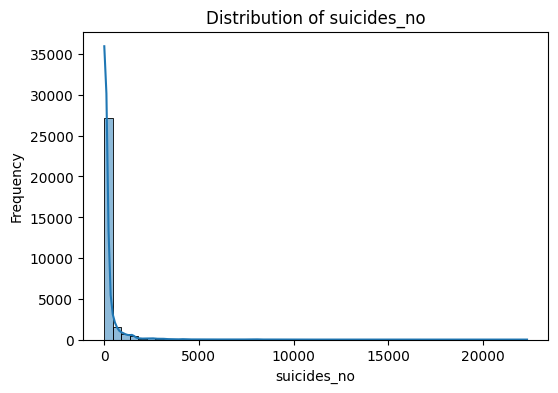

In [10]:
# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(df['suicides_no'].dropna(), bins=50, kde=True)
plt.title("Distribution of suicides_no")
plt.xlabel("suicides_no")
plt.ylabel("Frequency")
plt.show()


Extremely Right-Skewed Distribution
A skew of 10.6 is very high — it means the distribution is heavily "tailed" to the right.
Most data points are clustered at the lower end (very low suicide counts).
A small number of observations have extremely high values, which are pulling the mean far away from the median.

i.e. Most countries or subgroups report very low suicide numbers.
A handful of countries/years report very high numbers that dominate the average.

In [11]:
print("Column: suicides/100k pop")
print(df['suicides/100k pop'].describe())
print(f"Skewness: {df['suicides/100k pop'].skew()}")

# Entries with suicides/100k pop > 100
high_rate = df[df['suicides/100k pop'] > 100]
print(f"\nRows with suicides/100k pop > 100: {len(high_rate)}")

other_rates = df[df['suicides/100k pop'] < 100]
print(f"\nRows with suicides/100k pop < 100: {len(other_rates)}")


Column: suicides/100k pop
count    31756.000000
mean        11.716668
std         21.590926
min          0.000000
25%          0.370000
50%          4.285000
75%         14.560000
max        515.092734
Name: suicides/100k pop, dtype: float64
Skewness: 7.358361333272774

Rows with suicides/100k pop > 100: 227

Rows with suicides/100k pop < 100: 31529


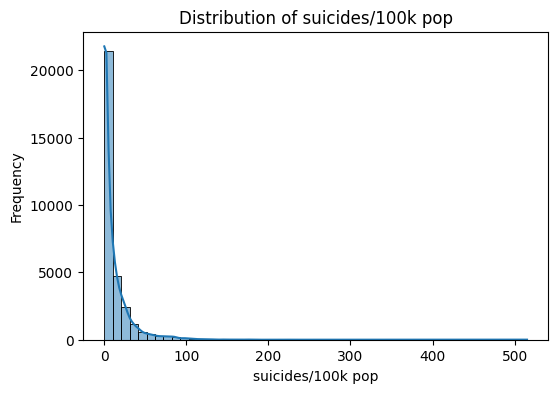

In [12]:
# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(df['suicides/100k pop'], bins=50, kde=True)
plt.title("Distribution of suicides/100k pop")
plt.xlabel("suicides/100k pop")
plt.ylabel("Frequency")
plt.show()

Strong Right Skew (7.36)
This is extreme skew, meaning most suicide rates per 100k people are very low, but a few entries are extremely high.
These outliers pull the mean upward, making it unrepresentative of the majority.

Mean = 11.7

Median = 4.29 → Most rows are well below the mean

Max = 515 → Anomalous or extraordinary situations (tiny populations?/True crises?)

In [13]:
# HDI for year
print("Column: HDI for year")
print(df['HDI for year'].describe())
print(f"Skewness: {df['HDI for year'].dropna().skew()}")

Column: HDI for year
count    12300.000000
mean         0.793666
std          0.097480
min          0.377790
25%          0.727000
50%          0.800457
75%          0.874000
max          0.975114
Name: HDI for year, dtype: float64
Skewness: -0.4906762456448335


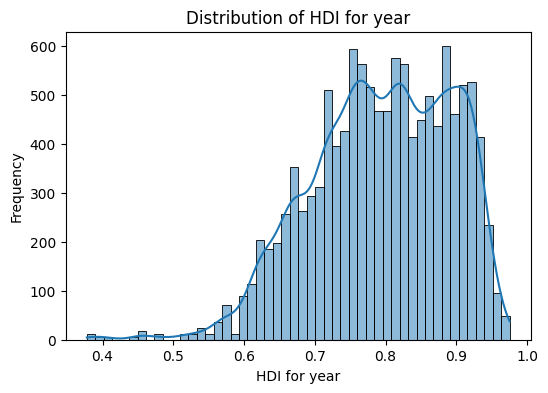

In [14]:
# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(df['HDI for year'].dropna(), bins=50, kde=True)
plt.title("Distribution of HDI for year")
plt.xlabel("HDI for year")
plt.ylabel("Frequency")
plt.show()

Mild negative skew.

In simple terms: There are a few countries with very low HDI, but most are in the higher range.

The mean (0.7937) is slightly less than the median (0.8005) — typical for left-skewed data.

In [15]:
# Check if 'HDI for year' has correct float values or weird symbols
df['HDI for year'].dropna().unique()[:10]

array([0.619, 0.656, 0.695, 0.722, 0.781, 0.783, 0.694, 0.705, 0.731,
       0.762])

the results seem great and require, no further processing

In [16]:
#Check for Inconsistencies Across Categorical Columns
#like typos/ inconsistent capitalization/ unexpected results
print(df['age'].unique())
print(df['sex'].unique())
print(df['generation'].unique())


['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']
['male' 'female']
['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']


No issues are found in the categorical values

In [17]:
#Cross-Column Logical Checks

#suicides_no > population → Impossible
invalid_suicide_counts = df[df['suicides_no'] > df['population']]
print(f"Rows where suicides > population: {len(invalid_suicide_counts)}")

#Same country-year having different gdp_for_year ($) values
gdp_inconsistency = df.groupby(['country', 'year'])[' gdp_for_year ($) '].nunique()
print("Country-year pairs with inconsistent GDP values:")
print(gdp_inconsistency[gdp_inconsistency > 1])


Rows where suicides > population: 0
Country-year pairs with inconsistent GDP values:
Series([], Name:  gdp_for_year ($) , dtype: int64)


Great, no logical problems are found

In [18]:
# Suicide rate by age group
df.groupby('age')['suicides/100k pop'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
15-24 years,5298.0,8.076554,10.372642,0.0,1.22000,4.820,11.2250,155.389179
25-34 years,5298.0,11.107635,16.271942,0.0,1.64000,5.820,15.0300,329.299222
35-54 years,5298.0,14.031126,24.842680,0.0,2.02250,7.545,18.0475,515.092734
5-14 years,5266.0,0.559401,1.007269,0.0,0.00000,0.250,0.7200,18.920000
55-74 years,5298.0,14.952714,23.221884,0.0,1.43250,8.335,19.8700,515.092734
75+ years,5298.0,21.505186,31.871564,0.0,0.23794,9.200,29.1325,515.092734


1. Risk Rises with Age

    Clear upward trend in mean values from youth (5–14) to elderly (75+).
   
      75+ years group has the highest mean (21.5), median, and standard deviation — likely due to:
    
     - Isolation
    
     - Health issues
    
     - Economic/retirement-related stress


2. Youth Suicide Is Rare, But Not Zero
5–14 years still shows suicide presence (max = 18.9), though rare — may warrant mental health exploration for edge cases.



In [19]:
# Suicide rate by generation
df.groupby('generation')['suicides/100k pop'].describe()


,count,mean,std,min,25%,50%,75%,max
generation,,,,,,,,
Boomers,5646.0,13.432480,18.949015,0.0,1.780000,7.600,17.6300,329.299222
G.I. Generation,4056.0,17.916075,34.605621,0.0,0.012142,4.125,23.1400,515.092734
Generation X,7720.0,8.936886,13.188458,0.0,0.290000,4.180,11.9425,155.389179
Generation Z,1470.0,0.642299,1.044738,0.0,0.000000,0.330,0.8775,11.020000
Millenials,5844.0,5.383597,8.464176,0.0,0.270000,1.720,7.0000,71.170000
Silent,7020.0,17.402911,27.436297,0.0,1.370000,8.830,21.7925,515.092734


1. G.I. & Silent Generations Show the Highest Suicide Rates
Both generations have extremely high max values (515 per 100k).
High mean and median → not just outliers; their entire distribution is shifted higher.

2. Younger Generations = Lower Suicide Rates
Gen Z and Millennials show significantly lower means, medians, and variability.

i.e. Older generations (especially G.I. and Silent) have higher and more volatile suicide rates per 100k, while Gen Z and Millennials show much lower and more stable rates.
This reflects both real-world age-linked risk factors and potential data/reporting biases in younger populations.

**Assessing results:**
 - we need to consider the skewness of some columns during the analysis.

 - columns like suicides/100k pop and gdp_for_year ($) need to be renamed. We should replace spaces and special characters in column names with underscores to ensure consistent formatting.

 - country-year column seems to be a redundant and can be removed or split if needed.

 - the HDI for year column contains many missing values, so we can either drop it or filter the dataset to only include rows where it's available.

 - the values in gdp_for_year ($) could be converted to float64 after removing formatting (e.g., commas and currency symbols).

 - no duplicate rows were found in the dataset.

 - further investigation is needed to assess consistency between the age and generation columns.
  

# Cleaning

In [20]:
df_copy = df.copy()
df_copy.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


In [21]:
#print the shape of the data
df_copy.shape

(31756, 12)

In [22]:
# replace spaces and symbols with underscores
df_copy.columns = (
    df_copy.columns
    .str.strip()                          # Trim leading/trailing whitespace
    .str.lower()                          # Convert to lowercase
    .str.replace(' ', '_')                # Replace spaces
    .str.replace('-', '_')                # Replace spaces
    .str.replace('/', '_')                # Replace slashes
    .str.replace(r'[\(\)\$]', '', regex=True)  # Remove parentheses and dollar signs
    .str.replace('__+', '_', regex=True)  # Collapse multiple underscores
    .str.strip('_')                       # Remove leading/trailing underscores
)
df_copy.columns


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_100k_pop', 'country_year', 'hdi_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [23]:
# First, create a new column by combining 'country' and 'year'
df_copy['country_year_check'] = df_copy['country'].astype(str) + df_copy['year'].astype(str)

# Now compare it with the existing 'country_year' column
if 'country_year' in df_copy.columns:
    match = (df_copy['country_year_check'] == df_copy['country_year']).all()
    print("Are 'country_year' and combined 'country' + 'year' identical?:", match)

    # show mismatches if they exist
    mismatches = df_copy[df_copy['country_year_check'] != df_copy['country_year']]
    print("Number of mismatched rows:", len(mismatches))
else:
    print("'country_year' column not found.")


Are 'country_year' and combined 'country' + 'year' identical?: True
Number of mismatched rows: 0


this means that the column is not useful and we will drop it

In [24]:
df_copy.drop(['country_year','country_year_check'], axis =1, inplace= True)
df_copy.shape

(31756, 11)

In [25]:
# Convert gdp_for_year to float (remove commas and convert type)
df_copy['gdp_for_year'] = df_copy['gdp_for_year'].str.replace(',', '').astype(float)

In [26]:
df_copy

,country,year,sex,age,suicides_no,population,suicides_100k_pop,hdi_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21.0,312900,6.710000,NaN,2.156625e+09,796.000000,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.190000,NaN,2.156625e+09,796.000000,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.830000,NaN,2.156625e+09,796.000000,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.590000,NaN,2.156625e+09,796.000000,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.280000,NaN,2.156625e+09,796.000000,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,0.785458,1.120000e+11,2638.326055,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,0.914735,2.700000e+12,40857.755580,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,0.918620,1.950000e+13,60109.655730,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,0.816745,6.423397e+10,18690.893840,G.I. Generation


# Data Analysis & Visualization

In [27]:
# Aggregate suicides by sex
sex_counts = df_copy.groupby('sex')['suicides_no'].sum().reset_index()
total_suicides = int(sex_counts['suicides_no'].sum())

color_map = {
    'male': 'royalblue',
    'female': 'deeppink'
}

fig = px.pie(
    sex_counts,
    names='sex',
    values='suicides_no',
    title='Number of Suicides by Gender',
    hole=0.5,
    color='sex',
    color_discrete_map=color_map
)

# Add total in center
fig.update_layout(
    title_x=0.5,
    title_font_size=20,
    font=dict(color='white'),
    paper_bgcolor='black',
    plot_bgcolor='black',
    annotations=[dict(
        text=f"Total<br>{total_suicides:,}",
        x=0.5, y=0.5,
        font_size=18,
        showarrow=False,
        font_color='white',
        align='center'
    )],
    legend=dict(
        x=1.05,  # Push legend further right
        y=0.5,
        font=dict(color='white'),
        bgcolor='black',
        bordercolor='gray',
        borderwidth=1
    )
)

fig.show()

### Record Distribution for Age Group and Year

In [28]:
age_counts = df_copy['age'].value_counts().sort_index().reset_index()
age_counts.columns = ['age_group', 'record_count']

fig = px.bar(
    age_counts,
    x='age_group',
    y='record_count',
    title='<b>Number of Records per Age Group</b>',
    labels={'record_count': 'Number of Records', 'age_group': 'Age Group'},
    text='record_count',
    template='plotly_dark',
    color_discrete_sequence=['skyblue']
)

fig.update_traces(textposition='outside')
fig.update_layout(
    title_x=0.5,
    font=dict(size=14),
    plot_bgcolor='black',
    paper_bgcolor='black',
    xaxis=dict(tickangle=-30)
)

fig.show()

The number of records is nearly identical across all age groups.

This suggests the dataset is evenly distributed by age, making comparisons between age groups reliable and unbiased.

In [29]:
# Count and sort records by generation size (descending)
generation_counts = df_copy['generation'].value_counts().reset_index()
generation_counts.columns = ['generation', 'record_count']
generation_counts = generation_counts.sort_values(by='record_count', ascending=False)

fig = px.bar(
    generation_counts,
    x='generation',
    y='record_count',
    title='<b>Number of Records per Generation</b>',
    labels={'record_count': 'Number of Records', 'generation': 'Generation'},
    text='record_count',
    template='plotly_dark',
    color_discrete_sequence=['orange']
)

fig.update_traces(textposition='outside')
fig.update_layout(
    title_x=0.5,
    font=dict(size=14),
    plot_bgcolor='black',
    paper_bgcolor='black',
    xaxis=dict(tickangle=-30)
)

fig.show()

The number of records varies significantly between generations.

Generations like Generation X and Silent are overrepresented, while Generation Z and the G.I. Generation are underrepresented.


Generation X has the highest number of suicide records in this dataset, but this may be due to their larger presence in the population and dataset coverage not necessarily a higher suicide rate.


To make fair comparisons, we need to calculate suicide rates per 100,000 people in each generation.


In [30]:
year_counts = df_copy['year'].value_counts().sort_index().reset_index()
year_counts.columns = ['year', 'record_count']

fig = px.bar(
    year_counts,
    x='year',
    y='record_count',
    title='<b>Number of Records per Year</b>',
    labels={'record_count': 'Number of Records', 'year': 'Year'},
    text='record_count',
    template='plotly_dark',
    color_discrete_sequence=['mediumseagreen']
)

fig.update_traces(textposition='outside')
fig.update_layout(
    title_x=0.5,
    font=dict(size=14),
    plot_bgcolor='black',
    paper_bgcolor='black',
    xaxis=dict(tickangle=-45)
)

fig.show()

###  Number of Records per Year

This bar chart illustrates how the dataset entries are distributed across the years **1985 to 2020**:

-  A steady increase in record count from **1985 to around 2005**
-  A gradual decline in entries starting around **2010**
-  A **sharp drop in 2016**, with **very few records** recorded that year

>  **Note**: The dramatic decline in 2016 likely indicates missing or incomplete data for that year, rather than an actual decrease in suicide cases.


In [31]:
fig = px.scatter(
    df_copy,
    x='gdp_per_capita',
    y='suicides_100k_pop',
    color='generation',
    title='<b>Suicide Rate vs GDP per Capita by Generation</b>',
    labels={
        'gdp_per_capita': 'GDP per Capita',
        'suicides_100k_pop': 'Suicides per 100k',
        'generation': 'Generation'
    },
    template='plotly_dark',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    title_x=0.5,
    font=dict(size=14),
    plot_bgcolor='black',
    paper_bgcolor='black',
    legend=dict(title='Generation')
)

fig.show()

### Suicide Rate vs GDP per Capita by Generation

This scatter plot shows the relationship between **GDP per capita** and **suicide rates per 100k population**, grouped by generation.

#### Key Observations:

- **Higher suicide rates are more common in countries with lower GDP per capita.**
  This trend appears across all generations.

- **Older generations** (especially the *G.I. Generation* and *Silent Generation*) are more frequently associated with **higher suicide rates**, particularly in low-income countries.

- **Younger generations** (like *Millennials* and *Gen Z*) show fewer high-rate cases.

- Most data points are concentrated below **$40,000 GDP per capita**



In [32]:
# Order age groups
age_order = [
    '5-14 years',
    '15-24 years',
    '25-34 years',
    '35-54 years',
    '55-74 years',
    '75+ years']

df_copy['age'] = pd.Categorical(df_copy['age'], categories=age_order, ordered=True)

In [33]:
# Compute average suicide rates by age group
avg_rates = df_copy.groupby('age')['suicides_100k_pop'].mean().reset_index()

fig = px.bar(
    avg_rates,
    x='age',
    y='suicides_100k_pop',
    title='<b>Average Suicide Rate per 100k by Age Group</b>',
    labels={'suicides_100k_pop': 'Avg Suicide Rate per 100k', 'age': 'Age Group'},
    text=avg_rates['suicides_100k_pop'].round(1),
    template='plotly_dark',
    color_discrete_sequence=['skyblue']
)

fig.update_traces(textposition='outside', marker_line_width=1.5, marker_line_color='black')
fig.update_layout(
    title_x=0.5,
    font=dict(size=14),
    plot_bgcolor='black',
    paper_bgcolor='black',
    xaxis=dict(tickangle=-30)
)

fig.show()

<ipython-input-33-5862281a28e9>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Average Suicide Rate per 100k by Age Group

This bar chart presents the **average suicide rate per 100,000 people** across different age categories.

---

#### Key Insights:

- **Suicide rates increase steadily with age**.
- **Breakdown by age group**:
  - **5–14 years**: Very low rate (~**0.6** per 100k)
  - **15–24 years**: Noticeable increase (~**8.1** per 100k)
  - **25–34 years**: Further rise (~**11.1** per 100k)
  - **35–54 years**: ~**14.0** per 100k
  - **55–74 years**: ~**15.0** per 100k
  - **75+ years**: Highest observed rate (~**21.5** per 100k)

---

#### Interpretation:

- The data shows a **clear age-related trend** in suicide risk.
- **Older adults**, particularly those aged **75+**, are at the **greatest risk** of suicide.


In [34]:
yearly_rate = df_copy.groupby('year')['suicides_100k_pop'].mean().reset_index()

fig = px.area(
    yearly_rate,
    x='year',
    y='suicides_100k_pop',
    title='<b>Average Suicide Rate per 100k Population per Year</b>',
    labels={'suicides_100k_pop': 'Avg Suicide Rate per 100k', 'year': 'Year'},
    markers=True,
    template='plotly_dark',
    color_discrete_sequence=['red']
)

fig.update_layout(
    hovermode='x',
    title_x=0.5,
    font=dict(size=14),
    plot_bgcolor='black',
    paper_bgcolor='black'
)

fig.show()

### Average Suicide Rate per 100k Population (1985–2020)

The graph shows how the average suicide rate per 100,000 people has changed over time.

- From **1985 to the early 1990s**, the suicide rate gradually increased, reaching a peak of about **15.5 per 100k**.
- Between **1995 and 2015**, the rate slowly declined and stabilized around **12–13 per 100k**.
- In **2016**, there is a **sharp drop** in the average, followed by unusually low values through 2020.
- The sudden dip in 2016 is due to a **significant drop in the number of recorded entries** that year.
- Starting from 2017, the number of records returns to normal, and the average suicide rate stabilizes, but it remains noticeably lower than the levels observed before 2016.


In [35]:
# Group and sum suicides by year, age, gender
grouped = df_copy.groupby(['year', 'age', 'sex'])['suicides_no'].sum().reset_index()

# Normalize within each year and gender
grouped['norm_suicides'] = grouped.groupby(['year', 'sex'])['suicides_no'].transform(lambda x: x / x.sum())

# Prepare data dictionaries
data_dict = {}
for gender in ['male', 'female']:
    df_gender = grouped[grouped['sex'] == gender]

    # Pivot raw and normalized
    pivot_raw = df_gender.pivot(index='age', columns='year', values='suicides_no')
    pivot_norm = df_gender.pivot(index='age', columns='year', values='norm_suicides')

    # hover text
    hover_raw = [
        [f"Year: {year}<br>Age Group: {age}<br>Gender: {gender.capitalize()}<br>Suicides: {int(val):,}" if pd.notna(val) else ""
         for year, val in zip(pivot_raw.columns, row)]
        for age, row in zip(pivot_raw.index, pivot_raw.values)
    ]

    hover_norm = [
        [f"Year: {year}<br>Age Group: {age}<br>Gender: {gender.capitalize()}<br>Normalized Rate: {val:.2%}" if pd.notna(val) else ""
         for year, val in zip(pivot_norm.columns, row)]
        for age, row in zip(pivot_norm.index, pivot_norm.values)
    ]

    # Store data
    data_dict[f"{gender}_raw"] = (pivot_raw, hover_raw)
    data_dict[f"{gender}_norm"] = (pivot_norm, hover_norm)

fig = go.Figure()

# Add traces for each gender and mode
visibility_flags = []
trace_names = []
for key, (pivot, hover) in data_dict.items():
    fig.add_trace(
        go.Heatmap(
            z=pivot.values,
            x=pivot.columns.astype(str),
            y=pivot.index.astype(str),
            colorscale='Greys',
            colorbar=dict(title="Suicides" if "raw" in key else "Normalized Rate", tickformat="," if "raw" in key else ".0%"),
            text=hover,
            hoverinfo="text",
            visible=False,
            name=key
        )
    )
    visibility_flags.append(False)
    trace_names.append(key)

# Set first trace visible by default (male raw)
fig.data[0].visible = True

# Define dropdown buttons
buttons = []
for i, name in enumerate(trace_names):
    vis = [False] * len(trace_names)
    vis[i] = True
    label = name.replace("_", " ").title()
    title = f"{'Normalized Rate' if 'norm' in name else 'Number of Suicides'} by Year, Age Group and Gender ({name.split('_')[0].capitalize()})"
    buttons.append(dict(
        label=label,
        method="update",
        args=[
            {"visible": vis},
            {"title": title}
        ]
    ))

# Layout with dropdown
fig.update_layout(
    title="Number of Suicides by Year, Age Group and Gender (Male)",
    xaxis=dict(title="Year", type="category", tickangle=45),
    yaxis=dict(title="Age Group", type="category"),
    font=dict(size=12),
    margin=dict(l=40, r=40, t=60, b=40),
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            showactive=True,
            x=0.5,
            xanchor="center",
            y=1.15,
            yanchor="top"
        )
    ]
)

fig.show()

<ipython-input-35-621d8d387683>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Suicide Distribution by Year, Age Group, and Gender

This visualization presents heatmaps showing the distribution of suicides across different **age groups**, **years**, and **genders**, from **1985 to 2020**. You can toggle between **raw counts** and **normalized rates**, as well as view data separately for **males and females**.

When viewing the normalized mode, values are adjusted to show the **proportional share** of suicides for each age group **within a given year and gender** — this removes distortions caused by years or genders with more or less data.

---

### What These Visualizations Tell Us

- **Darker shades** represent a **higher share of suicides** for that age group in a specific year and gender.
- The **35–54 years** age group consistently accounts for the **highest proportion** of suicides in most years for both males and females.
- The **5–14 years** group remains consistently light, indicating a **very low share** of suicide cases.
- The year **2016** appears unusually pale across all groups — this is due to **very few data entries**, making normalization essential for accurate comparison.

---

### Why Normalize the Data?

- Normalization **removes the effect of uneven data volume** across years and genders, especially for outliers like **2016**, which is underrepresented.
- Without normalization, some years may falsely appear to have fewer suicides simply due to **limited records**.
- It enables **fair comparison** of age-group suicide patterns **year by year**, and now, across **genders** as well.

---

### Insights

####  Male:
- **Middle-aged males (35–54 years)** consistently represent the **largest share** of suicides.
- **Older males (55–74 and 75+ years)** show an increasing trend over time, especially post-2000.
- **Younger males (15–24 years)** have a moderate but steady share, highlighting an area of concern.

####  Female:
- The **35–54 years** group is again dominant, but the distribution across age groups is **more balanced** than for males.
- **Females aged 25–34** make up a larger portion relative to their male counterparts.
- **Older females (55+)** show a slow but steady increase in share over the years.

---

You can use the dropdown menu in the visualization to switch between **raw numbers** and **normalized rates**, and to view data for **males or females** individually.


In [36]:
# Group data by country and calculate average suicide rate
country_data = df_copy.groupby("country")["suicides_100k_pop"].mean().reset_index()

fig = px.choropleth(
    country_data,
    locations="country",
    locationmode="country names",
    color="suicides_100k_pop",
    color_continuous_scale="Reds",
    title="Average Suicide Rate per 100k Population by Country",
    labels={"suicides_100k_pop": "Suicides per 100k"}
)
fig.update_traces(marker_line_width=0)
fig.update_layout(
    title_x=0.5,  # Center the title
    margin={"r":0, "t":50, "l":0, "b":0},
    width=1700,
    height=1000,
     geo=dict(
        showframe=False
    ),

)

fig.show()

In [37]:
# Group and aggregate suicides by country and age
treemap_data = df_copy.groupby(['country', 'age'])['suicides_no'].sum().reset_index()

# Remove rows with 0 suicides
treemap_data = treemap_data[treemap_data['suicides_no'] > 0]

fig = px.treemap(
    treemap_data,
    path=['country', 'age'],
    values='suicides_no',
    color='suicides_no',
    color_continuous_scale='Greys',  # Black and white
    title='Total Suicides by Country and Age Group'
)

fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()

<ipython-input-37-fc0c639ef118>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

